# Final Project Submission
Please fill out:

-  Student name: Steven Rosa
-  Student pace: part time
-  Scheduled project review date/time: Mon 4 Feb 2019 2pm EST
-  Instructor name: Jeff Herman
-  Blog post URL:

# Northwind Data Analysis

<a id="top"></a>

# Contents
- [Import libraries](#importlibraries)
- [Write functions](#writefunctions)
- [Exploratory data analysis](#eda)
- [Hypothesis test 1](#hypo1)
- [Hypothesis test 2](#hypo2)

<a id="importlibraries"></a>

# Import libraries
[(Back to top)](#top)

In [1]:
#Import libraries
import sqlalchemy #ORM
from sqlalchemy import create_engine #To connect to the database
from sqlalchemy.orm import Session, sessionmaker #To interact with the database as object
from sqlalchemy import inspect #To look at tables and column names
from sqlalchemy import MetaData #To reflect the engine object 
from sqlalchemy.ext.automap import automap_base # To create mappings from the reflection
import pandas as pd #To read in parts of the database as DataFrames

import matplotlib.pyplot as plt #For creating visualizations
%matplotlib inline
from scipy import stats #For pulling t values
from scipy.stats import norm #For plotting probablity density functions
import seaborn as sns #For plotting pdfs over histograms
import numpy as np #For mathematical operations and arrays
from sklearn.utils import resample #To pull samples from a small distribution (bootstrapping)

<a id="writefunctions"></a>

# Write functions
[(Back to top)](#top)

In [2]:
#Build a sampling distribution of the data 
#in order to get it more "normal"
#NOT IN USE, REPLACED BY BOOTSTRAPPING
def sampling_dist(data, dist=50, n=30):

    sample_dist = []
   
    while len(sample_dist) != dist: #Build a sample distribution
        sample = []
        while len(sample) != n:
            x = np.random.choice(data) #Get a value from the data with replacement
            sample.append(x) #Add the value to the sample
        sample_mean = sum(sample) / len(sample) #Get the mean of the sample
        sample_dist.append(sample_mean) #Add the mean to the sampling distribution
    
    return sample_dist

<a id="eda"></a>

# Exploratory data analysis
[(Back to top)](#top)

In [3]:
#Instantiate a session of the ORM
#Connect to the sqlite database file
engine = create_engine('sqlite:///Northwind_small.sqlite', echo = True)
#Bind a session factory to the engine
Session = sessionmaker(bind=engine)
#Instantiate a session
session = Session()

In [45]:
#An object to get a first look at the database
inspector = inspect(engine)

In [46]:
#Make a dict of list of names of all the columns in all the tables
#for easy reference

#Get list of all table names
table_names = inspector.get_table_names()

tables_columns = dict()
#For each table name
for table in table_names:
    column_names = []
    #for each column in the table, get just the name
    for column in inspector.get_columns(table):
        column_names.append(column['name'])
    tables_columns[table] = column_names

2019-01-31 19:59:23,406 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-01-31 19:59:23,407 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,410 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-01-31 19:59:23,411 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,414 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-01-31 19:59:23,414 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,417 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CustomerCustomerDemo")
2019-01-31 19:59:23,417 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,420 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CustomerDemographic")
2019-01-31 19:59:23,420 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,422 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Employee")
2019-01-31 19:59:23,423 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 19:59:23,426 INFO sqlalche

In [47]:
tables_columns['OrderDetail']

['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount']

In [52]:
tables_columns['Supplier']

['Id',
 'CompanyName',
 'ContactName',
 'ContactTitle',
 'Address',
 'City',
 'Region',
 'PostalCode',
 'Country',
 'Phone',
 'Fax',
 'HomePage']

In [49]:
conn = engine.connect()

In [53]:
results = conn.execute('''SELECT Supplier.CompanyName
                            FROM Supplier
                        ''')
print(results.fetchall())

2019-01-31 20:02:03,220 INFO sqlalchemy.engine.base.Engine SELECT Supplier.CompanyName
                            FROM Supplier
                        
2019-01-31 20:02:03,221 INFO sqlalchemy.engine.base.Engine ()
[('Exotic Liquids',), ('New Orleans Cajun Delights',), ("Grandma Kelly's Homestead",), ('Tokyo Traders',), ("Cooperativa de Quesos 'Las Cabras'",), ("Mayumi's",), ('Pavlova, Ltd.',), ('Specialty Biscuits, Ltd.',), ('PB Knäckebröd AB',), ('Refrescos Americanas LTDA',), ('Heli Süßwaren GmbH & Co. KG',), ('Plutzer Lebensmittelgroßmärkte AG',), ('Nord-Ost-Fisch Handelsgesellschaft mbH',), ('Formaggi Fortini s.r.l.',), ('Norske Meierier',), ('Bigfoot Breweries',), ('Svensk Sjöföda AB',), ('Aux joyeux ecclésiastiques',), ('New England Seafood Cannery',), ('Leka Trading',), ('Lyngbysild',), ('Zaanse Snoepfabriek',), ('Karkki Oy',), ("G'day, Mate",), ('Ma Maison',), ('Pasta Buttini s.r.l.',), ('Escargots Nouveaux',), ('Gai pâturage',), ("Forêts d'érables",)]


In [ ]:
#####FOR EDA
#Pull raw results from the database
#conn = engine.connect()
#results = conn.execute('''SELECT *
#                            FROM Category
#                        ;''')
#print(results.fetchall())

###conn = engine.connect()
#results = conn.execute("SELECT * FROM [Order];")
#df = pd.DataFrame(results.fetchall())
#df.head()

#results = conn.execute('''SELECT *
#                            FROM OrderDetail
#                        ;''')
#df = pd.DataFrame(results.fetchall())
#df.head()

#df = pd.read_sql_query('''SELECT * 
#                           FROM [Order]
#                       ;''', engine)
#df.head()

<a id="hypo1"></a>

# Hypothesis test 1
[(Back to top)](#top)

In [ ]:
#Look at number of orders per customer w/o discount
df_wo_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            WHERE OrderDetail.Discount == 0.0
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        """, engine)

#Look at number of orders per customer w/ discount
df_w_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            WHERE OrderDetail.Discount != 0.0
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        """, engine)

In [ ]:
df_wo_discount.head()

In [ ]:
df_w_discount.head()

In [ ]:
#Look at the levels of discount

df = pd.read_sql_query("""SELECT OrderDetail.*
                            FROM OrderDetail 
                        """, engine)
df['Discount'].value_counts()

In [ ]:
#See what one order looks like 
df = pd.read_sql_query('''SELECT *
                            FROM OrderDetail
                            LIMIT 1
                        ''', engine)

In [ ]:
#See what one order looks like
df

In [ ]:
#See what orders look like with total money spent
df = pd.read_sql_query('''SELECT *,
                                (od.UnitPrice * od.Quantity) total_price
                            FROM OrderDetail od
                        ''', engine)

In [ ]:
df.head()


In [4]:
#Compare quantities ordered with and without discounts

discs_ords = pd.read_sql_query('''SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06 
                                AND OrderDetail.Discount > 0.0
                                THEN 1 ELSE 0 END
                                ) disc06,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06
                                AND OrderDetail.Discount > 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc06,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1 
                                THEN 1 ELSE 0 END
                                ) disc10,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc10,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15 
                                THEN 1 ELSE 0 END
                                ) disc15,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc15,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2 
                                THEN 1 ELSE 0 END
                                ) disc20,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc20,                                
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25 
                                THEN 1 ELSE 0 END
                                ) disc25,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc25,
                            Count(*) total_orders,
                            SUM(OrderDetail.Quantity) total_quantities
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        ''', engine)


2019-01-31 18:42:15,520 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-01-31 18:42:15,521 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 18:42:15,523 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-01-31 18:42:15,524 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 18:42:15,525 INFO sqlalchemy.engine.base.Engine SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                              

In [5]:
#Compare quantities ordered with and without discounts
discs_ords.head()

,CustomerId,no_disc,quant_no_disc,all_discs,quant_all_discs,disc06,quant_disc06,disc10,quant_disc10,disc15,quant_disc15,disc20,quant_disc20,disc25,quant_disc25,total_orders,total_quantities
0,ALFKI,6,78,6,96,2,56,0,0,0,0,1,2,3,38,12,174
1,ANATR,10,63,0,0,0,0,0,0,0,0,0,0,0,0,10,63
2,ANTO,9,211,8,148,0,0,4,80,4,68,0,0,0,0,17,359
3,AROUT,23,439,7,211,3,128,2,40,1,28,1,15,0,0,30,650
4,BERGS,34,632,18,369,0,0,10,161,0,0,0,0,8,208,52,1001


In [ ]:
discs_ords.shape

In [19]:
print('Control group mean:', discs_ords['quant_no_disc'].mean())
print('Control group sum:', discs_ords['quant_no_disc'].sum())
print('Treatment group mean:', discs_ords['quant_all_discs'].mean())
print('Treatment group sum:', discs_ords['quant_all_discs'].sum())

Control group mean: 321.3370786516854
Control group sum: 28599
Treatment group mean: 255.25842696629215
Treatment group sum: 22718


(array([41., 21.,  9.,  6.,  4.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([   0.  ,  122.85,  245.7 ,  368.55,  491.4 ,  614.25,  737.1 ,
         859.95,  982.8 , 1105.65, 1228.5 , 1351.35, 1474.2 , 1597.05,
        1719.9 , 1842.75, 1965.6 , 2088.45, 2211.3 , 2334.15, 2457.  ]),
 <a list of 20 Patch objects>)

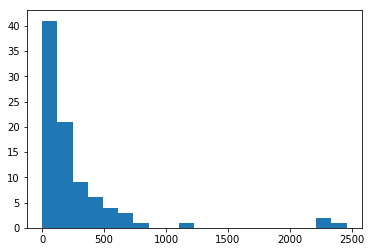

In [15]:
plt.hist(discs_ords['quant_all_discs'], bins=20)

(array([34., 20., 11.,  7., 10.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  11. ,  135.5,  260. ,  384.5,  509. ,  633.5,  758. ,  882.5,
        1007. , 1131.5, 1256. , 1380.5, 1505. , 1629.5, 1754. , 1878.5,
        2003. , 2127.5, 2252. , 2376.5, 2501. ]),
 <a list of 20 Patch objects>)

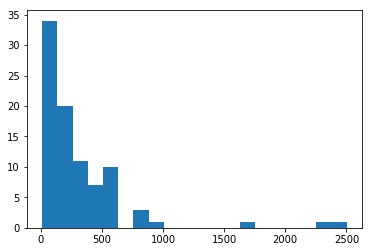

In [16]:
plt.hist(discs_ords['quant_no_disc'], bins=20)

In [ ]:
#Again, the two distributions look very close, both with greatest density around the lower values
#At this point I can predict that there won't be a significant difference between the two

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


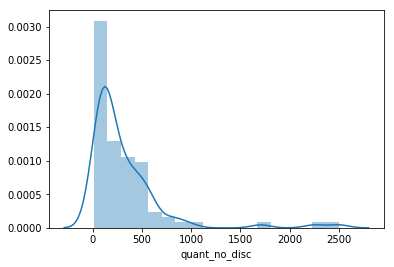

In [18]:
#Show the distribution with a kde to check for normality
sns.distplot(discs_ords['quant_no_disc'])

In [19]:
print("The population distribution has only", discs_ords.shape[0], "values.")

The population distribution has only 89 values.


### Hypothesis 1: Resampling by bootstrapping

In [13]:
#Bootstrap method via https://codingdisciple.com/bootstrap-hypothesis-testing.html
#Get the data to look more "normal" with bootstrapping
#"Control" is the no-discount group
#"Treatment" is the discount group

In [14]:
alpha = 0.05 # The value chosen for comparison with the test statistic.
#Test statistic will need to be lower than this in order to reject the null hypothesis.

In [15]:
p = None #The value chosen for the test statistic. 
#In this case, it will be the number of differences in mean greater than
#or equal to the observed difference in mean between the no-discount dist
# (control group) and the with-discount dist (treatment group.)

In [16]:
#Put the two groups of data into arrays to be resampled &c
control1 = discs_ords['quant_no_disc'] #The quantities of items ordered without discount
treatment1 = discs_ords['quant_all_discs'] #The quantitites of items ordered with a discount

permus = 10000 #number of samples to take

combo = np.concatenate((control1, treatment1), axis = 0) #both dists combined for taking samples

permus_control1 = []
permus_treatment1 = []

for i in range(permus): #Generate this many permutations
    np.random.seed(i) #seed for consistency
    permus_control1.append(resample(combo, n_samples = len(control1)))
    permus_treatment1.append(resample(combo, n_samples = len(treatment1)))
    
#Take the difference in means between the two sets of permutations
diff_boot_means = (np.mean(permus_control1, axis = 1) - np.mean(permus_treatment1, axis = 1))

observed_diff = (np.mean(control1) - np.mean(treatment1))
print('Observed difference between the means:', observed_diff)

In [94]:
#Find the p value by counting how many differences in mean were greater than 
#or equal to the observed difference in means.
means_below_observed = diff_boot_means[diff_boot_means >= observed_diff].shape[0]
p = means_below_observed / permus
p

0.1467

In [88]:
#Get the difference between control and treatment to 
#find the confidence interval
lower_bound = np.percentile(diff_boot_means, 2.5)
upper_bound = np.percentile(diff_boot_means, 97.5)

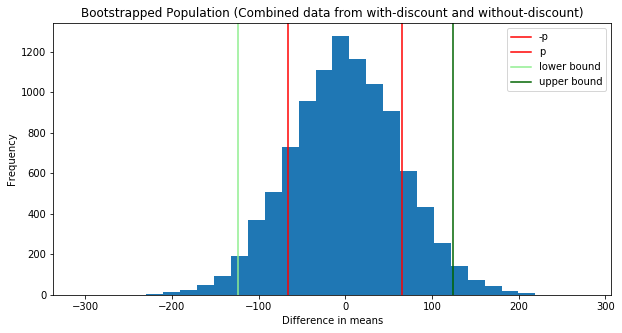

In [93]:
#Plot the differences in means between the 2 bootstrapped groups with the p value
fig = plt.figure(figsize = (10,5))
ax = plt.hist(diff_boot_means, bins = 30)
plt.axvline(-observed_diff, color = 'red', label = '-p')
plt.axvline(observed_diff, color = 'red', label = 'p')
plt.axvline(lower_bound, color = 'lightgreen', label = 'lower bound')
plt.axvline(upper_bound, color = 'darkgreen', label = 'upper bound')
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.legend()
plt.title('Bootstrapped Population (Combined data from with-discount and without-discount)')
plt.show()

In [98]:
#The p-value falls outside of both rejection regions. 
print(means_below_observed, 'out of', permus, 'samples had a difference in means of', 
      round(observed_diff, 2), 'or higher.')

1467 out of 10000 samples had a difference in means of 66.08 or higher.


### Hypothesis 1, Part 2: At what level of discount?

In [20]:
disc06 = discs_ords['quant_disc06'] #quantities of items ordered with 06% discount
disc10 = discs_ords['quant_disc10'] #quantities of items ordered with 10% discount
disc15 = discs_ords['quant_disc15'] #quantities of items ordered with 15% discount
disc20 = discs_ords['quant_disc20'] #quantities of items ordered with 20% discount
disc25 = discs_ords['quant_disc25'] #quantities of items ordered with 25% discount

In [21]:
disc_levels = [disc06, disc10, disc15, disc20, disc25]

In [28]:
print(treatment1.mean(), treatment1.sum())
for level in disc_levels:
    print(level.mean(), level.sum(), level[level > 0].shape[0])

255.25842696629215 22718
58.359550561797754 5194 41
49.056179775280896 4366 38
50.06741573033708 4456 38
48.8876404494382 4351 39
48.86516853932584 4349 38


In [29]:
#HISTS TO BE PUT IN LINE LATER
#for level in disc_levels:
#    plt.hist(level, bins=20)
#    plt.show()
#Hists show that these dists are all non-normal too.

In [40]:
#More bootstrapping
#Put the two groups of data into arrays to be resampled &c
permus = 10000 #number of samples to take

combo06 = []
combo10 = []
combo15 = []
combo20 = []
combo25 = []
combos = [combo06, combo10, combo15, combo20, combo25]
discounts = ['.06', '.10', '.15', '.20', '.25']
levels_combos = list(zip(disc_levels, combos, discounts))

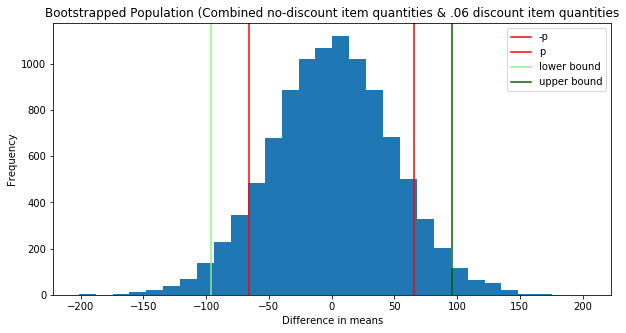

Observed difference between the means: 66.07865168539323
P-value: 0.0857
Lower bound: -95.8202247191011 Upper bound: 96.16348314606732


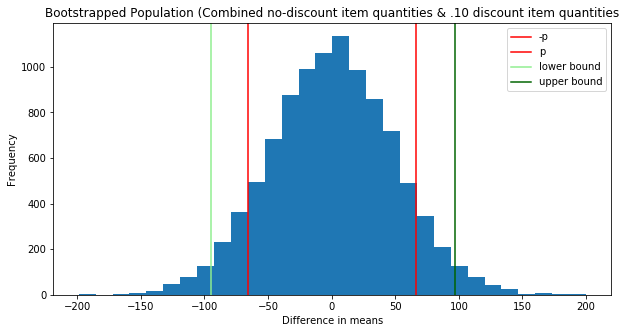

Observed difference between the means: 66.07865168539323
P-value: 0.0862
Lower bound: -94.83258426966292 Upper bound: 97.001404494382


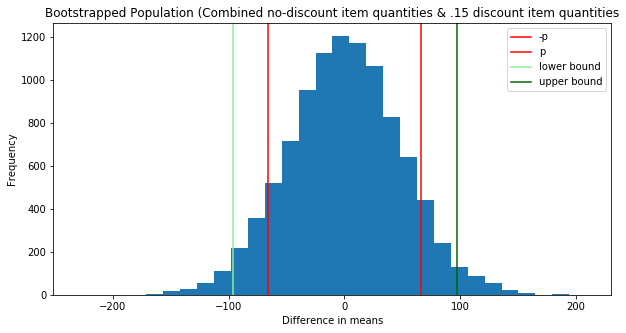

Observed difference between the means: 66.07865168539323
P-value: 0.0879
Lower bound: -96.1137640449438 Upper bound: 96.97780898876404


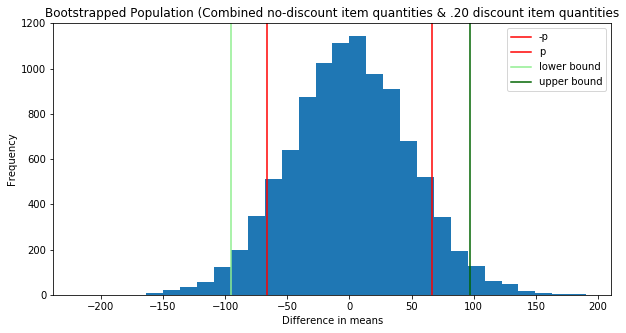

Observed difference between the means: 66.07865168539323
P-value: 0.0867
Lower bound: -95.39353932584267 Upper bound: 96.80898876404494


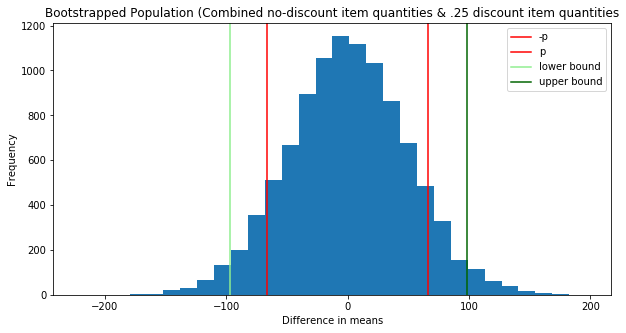

Observed difference between the means: 66.07865168539323
P-value: 0.0879
Lower bound: -96.56264044943818 Upper bound: 98.48398876404494


In [44]:
control = control1

for treatment, combo, discount in levels_combos:
    combo = np.concatenate((control1, treatment), axis = 0) #both dists combined for taking samples

    permus_control = []
    permus_treatment = []

    for i in range(permus): #Generate this many permutations
        np.random.seed(i) #seed for consistency
        permus_control.append(resample(combo, n_samples = len(control)))
        permus_treatment.append(resample(combo, n_samples = len(treatment)))
    
    #Take the difference in means between the two sets of permutations
    diff_boot_means = (np.mean(permus_control, axis = 1) - np.mean(permus_treatment, axis = 1))
    observed_diff = (np.mean(control1) - np.mean(treatment1)) 

    #Find the p value by counting how many differences in mean were greater than 
    #or equal to the observed difference in means.
    means_below_observed = diff_boot_means[diff_boot_means >= observed_diff].shape[0]
    p = means_below_observed / permus

    #Get the difference between control and treatment to 
    #find the confidence interval
    lower_bound = np.percentile(diff_boot_means, 2.5)
    upper_bound = np.percentile(diff_boot_means, 97.5)
    
    #Plot the differences in means between the 2 bootstrapped groups with the p value
    fig = plt.figure(figsize = (10,5))
    ax = plt.hist(diff_boot_means, bins = 30)
    plt.axvline(-observed_diff, color = 'red', label = '-p')
    plt.axvline(observed_diff, color = 'red', label = 'p')
    plt.axvline(lower_bound, color = 'lightgreen', label = 'lower bound')
    plt.axvline(upper_bound, color = 'darkgreen', label = 'upper bound')
    plt.xlabel('Difference in means')
    plt.ylabel('Frequency')
    plt.legend()
    title = 'Bootstrapped Population (Combined no-discount item quantities & ' + discount + ' discount item quantities)'
    plt.title(title)
    plt.show()
    
    #Print summary
    print('Observed difference between the means:', observed_diff)
    print('P-value:', p)
    print('Lower bound:', lower_bound, 'Upper bound:', upper_bound)

In [ ]:
#RESULTS FOR HYPOTHESIS 1 PART 2: Null hypothesis is accepted

In [ ]:
#HYPO 1 PART 1
#Sanity check for quantities
#w/o discount. ALL GOOD
#df_wo_discount = pd.read_sql_query('''SELECT [Order].CustomerId, 
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount == 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_nodisc
#                                        FROM OrderDetail
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                    ''', engine)

#w/ discount
#df_w_discount = pd.read_sql_query('''SELECT [Order].CustomerId,
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount != 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_disc
#                                        FROM OrderDetail 
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        WHERE OrderDetail.Discount != 0.0
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                ''', engine)

In [ ]:
#HYPO 1 PART 1
#Not sure whether grouping is affecting the quantity sums per order. 
#i.e. is it adding up the quantities for every record assoc with an order id or just for one?
#Look at number of orders per cust id
#alfki = pd.read_sql_query("""SELECT [Order].CustomerId, OrderDetail.*
#                            FROM OrderDetail 
#                            
#                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                            WHERE [Order].CustomerId == 'ALFKI'
#                        """, engine)
#PROVEN: sum is of quantities for every record not the group
#alfki['Quantity'].sum()

In [103]:
#FAILED T DIST METHOD TO BE DELETED
#Check for similarity between sampling distribution means
#and population means
control1.mean(), discs_ords['quant_no_disc'].mean()

(320.30266666666665, 321.3370786516854)

In [104]:
treatment1.mean(), discs_ords['quant_all_discs'].mean()

(255.23933333333335, 255.25842696629215)

In [ ]:
#Both are pretty close

In [34]:
diff = control1.mean() - treatment1.mean()
diff

64.24199999999996

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


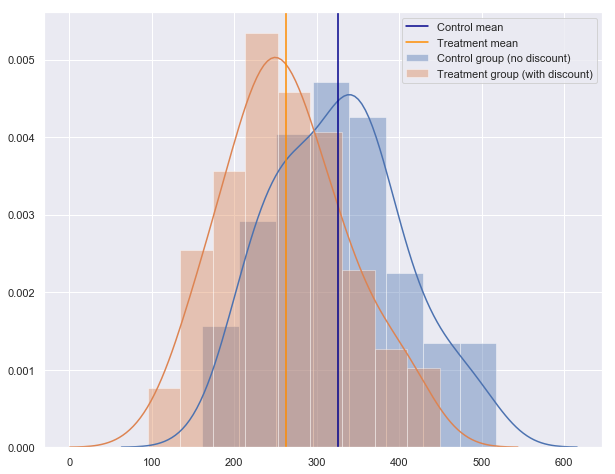

In [90]:
#Compare both sampling distributions with hist and kde
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(control1, label = "Control group (no discount)")
sns.distplot(treatment1, label = "Treatment group (with discount)")
plt.axvline(control1.mean(), color = 'darkblue', label = 'Control mean')
plt.axvline(treatment1.mean(), color = 'darkorange', label = 'Treatment mean')
plt.legend()
plt.show()

In [28]:
#This plot shows that the mean for the control group is higher.
#The question is, where on the distribution for the control group
#would the value for the mean of the treament group fall? If it is
#outside the critical region in the tails, then it will not be statistically
#significantly different.

In [108]:
control1.mean(), treatment1.mean()

(320.30266666666665, 255.23933333333335)

In [92]:
control1.std(), treatment1.std()

(78.659613988939, 74.82993678706107)

In [55]:
#Calculate a two-sample t statistic
#First get variance of both samples
var = ((control1.std()**2) + (treatment1.std()**2)) / (len(control1) + len(treatment1) - 2)
var

59.5295672345679

In [59]:
control1.std()**2

6187.334872888888

In [62]:
treatment1.std()**2

5599.519439555556

In [78]:
control1_var = sum([(i - np.mean(control1))**2 for i in control1])
control1_var

618733.4872888888

In [79]:
treatment1_var = sum([(i - np.mean(treatment1))**2 for i in treatment1])
treatment1_var

559951.9439555553

In [67]:
#FROM THE LAB ON TWO SAMPLE T TESTS
#def variance(sample):
#    sample_mean = np.mean(sample)
#    return sum([(i - sample_mean)**2 for i in sample])
#def sample_variance(sample1, sample2):
#    n_1, n_2 = len(sample1), len(sample2)
#    var_1, var_2 = variance(sample1), variance(sample2)
#    return (var_1 + var_2)/((n_1 + n_2)-2)

In [80]:
vari = (control1_var + treatment1_var) / (len(control1) + len(treatment1) -2)
vari

5952.9567234567885

In [81]:
#Build numerator for t statistic
numer = np.mean(treatment1) - np.mean(control1)
#Build denominator for t statistic
denom = np.sqrt(vari * ((1/len(treatment1)) + (1/len(control1))))
t = numer / denom
t

-5.887591810766747

In [109]:
test_stat, p_value = stats.ttest_ind(treatment1, control1)
test_stat, p_value

(-5.508644149453619, 1.1153214293532252e-07)

In [111]:
#Another way to find the t value
t_alt = stats.t.ppf(q = 0.975, df = (len(control1) + len(treatment1) -2))
t_alt

1.9720174778338955

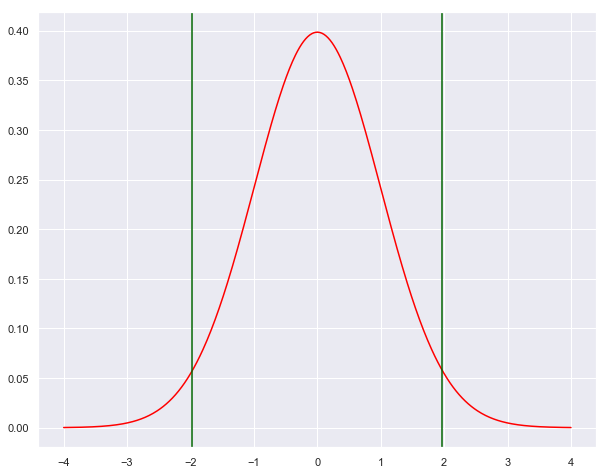

In [106]:
#Draw a t distribution
#A set of points for x
xs = np.linspace(-4, 4, 500)
#A probability density function for the t-dist
ys = stats.t.pdf(xs, (len(control1) + len(treatment1) - 2), 0, 1)

#Draw a figure
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
#t dist in red
ax.plot(xs, ys, color = 'red')
#critical region
ax.axvline(t_alt, color = 'darkgreen')
#other critical region
ax.axvline(-t_alt, color = 'darkgreen')
plt.show()

In [85]:
stats.t.sf(abs(t), len(control1) + len(treatment1) - 1) * 2

1.64338928498428e-08

In [10]:
#MORE BOOTSTRAPPING CODE FOR HYPO 1. FINDS THE CONFIDENCE INTERVALS
#NOT NEEDED FOR HYPO 1, SAVE FOR LATER
#control1_boot = [] #10,000 permutations with replacement 
#for i in range(permus):
#    np.random.seed(i)
#    control1_boot.append((resample(control1)))

#control1_boot = np.mean(control1_boot, axis = 1)
#control1_boot #10,000 means

#treatment1_boot = [] #10,000 permutations with replacement 
#for i in range(permus):
#    np.random.seed(i)
#    treatment1_boot.append((resample(treatment1)))

#treatment1_boot = np.mean(treatment1_boot, axis = 1)
#treatment1_boot #10,000 means

#Get the difference between control and treatment to 
#find the confidence interval
#diffs = control1_boot - treatment1_boot
#lower_bound = np.percentile(diffs, 2.5)
#upper_bound = np.percentile(diffs, 97.5)

#Plot the confidence interval
#fig = plt.figure(figsize=(10,3))
#ax = plt.hist(diffs, bins=30)

#plt.xlabel('Differences between quantities of items ordered, no-discount vs with-discount')
#plt.ylabel('Frequency')
#plt.axvline(lower_bound, color = 'green')
#plt.axvline(upper_bound, color = 'green')
#plt.axvline(66.07, color = 'red') #true difference in means
#plt.title('Bootstrapped Pop (Differences Between 2 Control 1 & Treatment 1)')
#plt.show()

#print('95% confidence that true difference between control and treatment groups is between', 
#      round(lower_bound, 2), 'and', round(upper_bound, 2), ', assuming null hypothesis is correct.')

#mu1 = discs_ords['quant_no_disc'].mean() - discs_ords['quant_all_discs'].mean()
#print('The true difference in means for control 1 and treatment 1 is', mu1)

In [ ]:
####EDA
#Look at how many customers each company has
df = pd.read_sql_query("""SELECT Customer.Id, Customer.CompanyName
                            FROM Customer
                            ORDER BY Customer.CompanyName
                        """, engine)

In [ ]:
#Every company has only one customer. Orders can therefore be counted by customer or by company.
sum(df['CompanyName'].value_counts() > 1)

In [ ]:
# JUST AN EXAMPLE from the labs
#"""SELECT o.ID, c.CompanyName, Count(*) num_orders 
#    FROM [Order] o
#    INNER JOIN Customer c on o.CustomerID = c.ID 
#    GROUP BY c.CompanyName 
#    ORDER BY num_orders DESC"""

#df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders FROM [Order] \
#o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY c.CompanyName ORDER BY num_orders DESC""", engine)
#df.head()

In [56]:
#######################################
#AUTOMAPPER BITS
#Instantiate metadata to reflect the engine
metadata = MetaData()
metadata.reflect(engine)

2019-01-31 20:03:17,912 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-01-31 20:03:17,913 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:17,916 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-01-31 20:03:17,917 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:17,919 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-01-31 20:03:17,920 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:17,921 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-01-31 20:03:17,922 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:17,923 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-01-31 20:03:17,924 INFO sqlalchemy.engine.base.Engin

2019-01-31 20:03:18,009 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-01-31 20:03:18,010 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,011 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-01-31 20:03:18,011 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,012 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-01-31 20:03:18,013 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,014 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-01-31 20:03:18,014 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,016 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-01-31 20:03:18,016 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,017 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-01-31 20:03:18,141 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-01-31 20:03:18,142 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,147 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-01-31 20:03:18,149 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,151 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-01-31 20:03:18,152 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,154 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-01-31 20:03:18,155 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,157 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-01-31 20:03:18,158 INFO sqlalchemy.engine.base.Engine ()
2019-01-31 20:03:18,160 INFO 

In [57]:
#Create mappings to treat the database elements as OOP objects
Base = automap_base(metadata=metadata)
Base.prepare()

In [ ]:
#['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 
#'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']

In [58]:
#Create an object for each table
Category = Base.classes.Category
Customer = Base.classes.Customer
CustomerCustomerDemo = Base.classes.CustomerCustomerDemo
CustomerDemographic = Base.classes.CustomerDemographic
Employee = Base.classes.Employee
EmployeeTerritory = Base.classes.EmployeeTerritory
Order = Base.classes.Order
OrderDetail = Base.classes.OrderDetail
Product = Base.classes.Product
Region = Base.classes.Region
Shipper = Base.classes.Shipper
Supplier = Base.classes.Supplier
Territory = Base.classes.Territory

In [61]:
#Look at descriptions of categories for items sold
for instance in session.query(Category):
    print(instance.CategoryName, ":", instance.Description)

2019-01-31 20:04:41,962 INFO sqlalchemy.engine.base.Engine SELECT "Category"."Id" AS "Category_Id", "Category"."CategoryName" AS "Category_CategoryName", "Category"."Description" AS "Category_Description" 
FROM "Category"
2019-01-31 20:04:41,964 INFO sqlalchemy.engine.base.Engine ()
Beverages : Soft drinks, coffees, teas, beers, and ales
Condiments : Sweet and savory sauces, relishes, spreads, and seasonings
Confections : Desserts, candies, and sweet breads
Dairy Products : Cheeses
Grains/Cereals : Breads, crackers, pasta, and cereal
Meat/Poultry : Prepared meats
Produce : Dried fruit and bean curd
Seafood : Seaweed and fish


In [ ]:
countries = []
for instance in session.query(Customer):
    countries.append(instance.Country)

In [ ]:
countries_df = pd.DataFrame(countries)
countries_df[0].value_counts()

In [62]:
#How many customers are served in each region?
regions = []
for instance in session.query(Customer):
    regions.append(instance.Region)

regions_df = pd.DataFrame(regions)
regions_df[0].value_counts()

2019-01-31 20:05:44,831 INFO sqlalchemy.engine.base.Engine SELECT "Customer"."Id" AS "Customer_Id", "Customer"."CompanyName" AS "Customer_CompanyName", "Customer"."ContactName" AS "Customer_ContactName", "Customer"."ContactTitle" AS "Customer_ContactTitle", "Customer"."Address" AS "Customer_Address", "Customer"."City" AS "Customer_City", "Customer"."Region" AS "Customer_Region", "Customer"."PostalCode" AS "Customer_PostalCode", "Customer"."Country" AS "Customer_Country", "Customer"."Phone" AS "Customer_Phone", "Customer"."Fax" AS "Customer_Fax" 
FROM "Customer"
2019-01-31 20:05:44,832 INFO sqlalchemy.engine.base.Engine ()


Western Europe     28
North America      16
South America      16
Southern Europe    10
British Isles       8
Central America     5
Northern Europe     4
Scandinavia         3
Eastern Europe      1
Name: 0, dtype: int64

In [63]:
tables_columns['Customer']

['Id',
 'CompanyName',
 'ContactName',
 'ContactTitle',
 'Address',
 'City',
 'Region',
 'PostalCode',
 'Country',
 'Phone',
 'Fax']

In [67]:
#How many customers ae served?
names = []
for instance in session.query(Customer):
    names.append(instance.ContactName)

print('\n')
print(len(set(names)), 'customers served.')

2019-01-31 20:09:24,591 INFO sqlalchemy.engine.base.Engine SELECT "Customer"."Id" AS "Customer_Id", "Customer"."CompanyName" AS "Customer_CompanyName", "Customer"."ContactName" AS "Customer_ContactName", "Customer"."ContactTitle" AS "Customer_ContactTitle", "Customer"."Address" AS "Customer_Address", "Customer"."City" AS "Customer_City", "Customer"."Region" AS "Customer_Region", "Customer"."PostalCode" AS "Customer_PostalCode", "Customer"."Country" AS "Customer_Country", "Customer"."Phone" AS "Customer_Phone", "Customer"."Fax" AS "Customer_Fax" 
FROM "Customer"
2019-01-31 20:09:24,592 INFO sqlalchemy.engine.base.Engine ()


91 customers served.


In [ ]:
session.query(Customer).column_descriptions

In [ ]:
result = session.execute('''SELECT *
                            FROM Customer
                        ;''')

In [ ]:
customer_df = pd.DataFrame(result.fetchall())

In [ ]:
customer_df.shape

## Hypothesis 1
Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

product (quantity) ordered by customers, no discount

product (quantity) order by customers, wiht discount

H0: Discount does not have an effect on the number of products ordered by a customer. Control = Treatment

H1: Discount has an effect on the number of products ordered by a customer. Control < or > Treament